Load raw data

In [ ]:
path_data = 'case_raw.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path_data)
df.head()

The statistical analysis : correlation

In [ ]:
df = df.dropna()
df = df.rename(columns={'Class':'label'})
df.replace('hcc', 4, inplace=True)
df.replace('dn', 3, inplace=True)
df.replace('hg', 2, inplace=True)
df.replace('rnlow', 1, inplace=True)
df.replace('normal', 1, inplace=True)

In [ ]:
corr = df.corr()
corr_top10 = corr.nlargest(10, 'label')
corr_top10 = corr_top10[list(corr_top10.index)]
corr_top10

,label,StDev_Nucleus_AreaShape_Orientation,Median_Nucleus_AreaShape_Compactness,Mean_Nucleus_AreaShape_Compactness,Q1_Cell_Eccentricity,Mean_Nucleus_AreaShape_Perimeter,Median_Nucleus_AreaShape_Perimeter,Q1_Nucleus_Cell_area_ratio,M_Cell_Eccentricity,M_Nucleus_Cell_area_ratio
label,1.000000,0.724212,0.581046,0.577135,0.470132,0.454910,0.413829,0.411023,0.406437,0.405100
StDev_Nucleus_AreaShape_Orientation,0.724212,1.000000,0.584197,0.641848,0.128355,0.294031,0.265412,0.393195,0.056439,0.350726
Median_Nucleus_AreaShape_Compactness,0.581046,0.584197,1.000000,0.928378,0.365902,0.548446,0.408715,0.281953,0.339668,0.348038
Mean_Nucleus_AreaShape_Compactness,0.577135,0.641848,0.928378,1.000000,0.303324,0.471151,0.320906,0.276315,0.279922,0.362721
Q1_Cell_Eccentricity,0.470132,0.128355,0.365902,0.303324,1.000000,0.270852,0.135585,-0.079965,0.987363,-0.041168
Mean_Nucleus_AreaShape_Perimeter,0.454910,0.294031,0.548446,0.471151,0.270852,1.000000,0.936734,0.495544,0.240750,0.564319
Median_Nucleus_AreaShape_Perimeter,0.413829,0.265412,0.408715,0.320906,0.135585,0.936734,1.000000,0.577071,0.096968,0.597099
Q1_Nucleus_Cell_area_ratio,0.411023,0.393195,0.281953,0.276315,-0.079965,0.495544,0.577071,1.000000,-0.134299,0.933093
M_Cell_Eccentricity,0.406437,0.056439,0.339668,0.279922,0.987363,0.240750,0.096968,-0.134299,1.000000,-0.069513
M_Nucleus_Cell_area_ratio,0.405100,0.350726,0.348038,0.362721,-0.041168,0.564319,0.597099,0.933093,-0.069513,1.000000


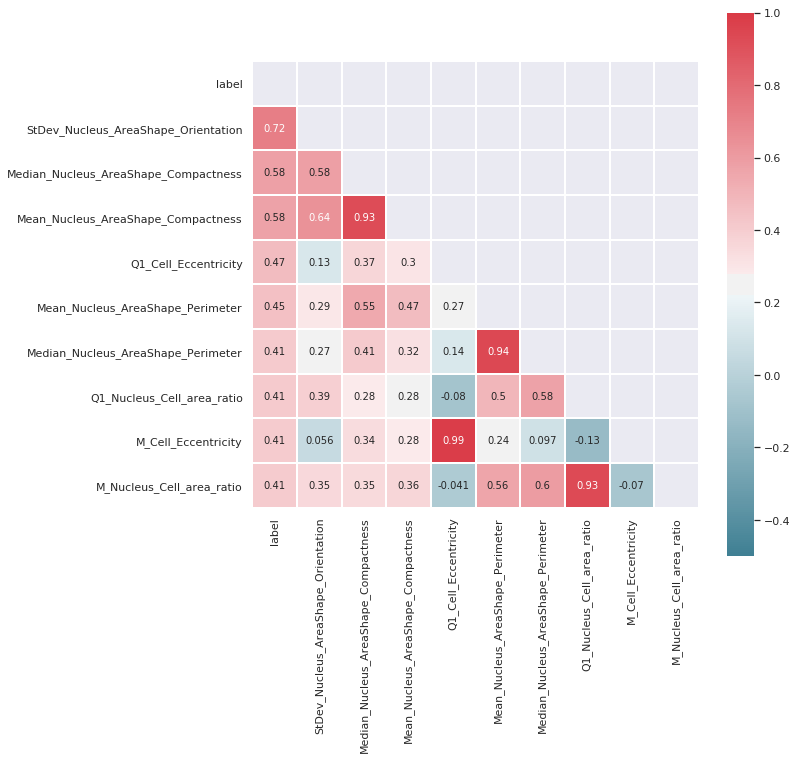

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

mask = np.triu(np.ones_like(corr_top10, dtype=bool))

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_top10, cmap=cmap, ax=ax, mask=mask,
            annot=True,
            linewidths=.9,
           annot_kws={"size": 10},
           square = True, vmin =-0.5 , vmax = 1)
plt.show()

Standard Scaler : mean -->0,          
variance --> unit variance

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

In [ ]:
dt_tot = df.dropna()

In [ ]:
temp_x = dt_tot[dt_tot.columns[2:]]
temp_x.index.name ='idx'
scaler = StandardScaler()
scaler.fit(temp_x)
transformed_x = scaler.transform(temp_x)

In [ ]:
transformed_d = pd.DataFrame(transformed_x, columns=dt_tot.columns[2:])

In [ ]:
temp_cols = dt_tot[dt_tot.columns[0:2]]

In [ ]:
scaled = pd.merge(temp_cols, transformed_d, left_index=True, right_index=True, how='left')

In [ ]:
scaled.describe()

Feature Selection : offers a effective way to overcome this challenge by eliminating redundant and irrelevant data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

data = scaled
data.head()

In [ ]:
data.describe()

,label,Mean_Nucleus_AreaShape_Area,Mean_Nucleus_AreaShape_Compactness,Mean_Nucleus_AreaShape_Eccentricity,Mean_Nucleus_AreaShape_Extent,Mean_Nucleus_AreaShape_FormFactor,Mean_Nucleus_AreaShape_MajorAxisLength,Mean_Nucleus_AreaShape_MaxFeretDiameter,Mean_Nucleus_AreaShape_MaximumRadius,Mean_Nucleus_AreaShape_MeanRadius,...,S_Cell_Eosin_OD_min,S_Cytoplasm_Hematoxylin_OD_mean,S_Cytoplasm_Hematoxylin_OD_std_dev,S_Cytoplasm_Hematoxylin_OD_max,S_Cytoplasm_Hematoxylin_OD_min,S_Cytoplasm_Eosin_OD_mean,S_Cytoplasm_Eosin_OD_std_dev,S_Cytoplasm_Eosin_OD_max,S_Cytoplasm_Eosin_OD_min,S_Nucleus_Cell_area_ratio
count,458.000000,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,...,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02,4.580000e+02
mean,2.631004,-6.981315e-17,1.427291e-15,-2.094395e-16,1.303179e-15,-2.792526e-16,9.308420e-17,1.861684e-16,3.102807e-16,1.241123e-16,...,1.861684e-16,6.050473e-16,-1.551403e-17,-3.723368e-16,-3.102807e-17,5.817763e-17,3.025237e-16,3.102807e-16,2.521030e-17,-1.978039e-16
std,1.218601,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,...,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00,1.001093e+00
min,1.000000,-9.284697e-01,-4.185197e+00,-2.495688e+00,-6.247215e+00,-1.497875e+00,-2.333320e+00,-2.417141e+00,-2.595860e+00,-2.517245e+00,...,-1.896237e+00,-1.462963e+00,-2.000259e+00,-1.855186e+00,-1.324633e+00,-2.352263e+00,-2.136714e+00,-1.394103e+00,-2.021400e+00,-4.877194e+00
25%,1.000000,-3.078386e-01,-3.888766e-01,-6.658618e-01,-4.914491e-01,-5.275381e-01,-5.041518e-01,-5.222288e-01,-6.264833e-01,-6.426237e-01,...,-8.146023e-01,-6.786142e-01,-7.286116e-01,-6.918618e-01,-6.640608e-01,-7.300782e-01,-7.936612e-01,-7.920371e-01,-7.555744e-01,-7.134253e-01
50%,3.000000,-8.195845e-02,1.039526e-01,1.124667e-01,1.001035e-01,-4.012905e-01,-1.537370e-02,-2.230690e-02,5.260798e-02,3.456128e-02,...,-7.025094e-02,-2.617017e-01,-1.908427e-01,-2.139071e-01,-1.736654e-01,-1.328597e-01,-1.595396e-02,-2.296815e-01,-9.300612e-02,2.775306e-02
75%,4.000000,1.652841e-01,5.963480e-01,7.728670e-01,6.227335e-01,-2.185578e-01,4.290144e-01,4.658265e-01,7.099334e-01,6.997674e-01,...,6.542616e-01,4.829844e-01,5.687910e-01,4.890911e-01,3.725403e-01,6.834357e-01,6.480479e-01,5.291412e-01,7.169188e-01,6.380477e-01
max,4.000000,1.873169e+01,3.861711e+00,2.279141e+00,3.209318e+00,5.144155e+00,1.251986e+01,1.100311e+01,2.617628e+00,2.714790e+00,...,2.571731e+00,6.202647e+00,5.081546e+00,4.634467e+00,7.853594e+00,4.609021e+00,3.755162e+00,4.114324e+00,3.208130e+00,3.065935e+00


In [ ]:
X_df = data.values[:,2:]
y_df = data['label']

In [ ]:
col_path = 'col_name.csv'
col_li = pd.read_csv(col_path)
cols_name = col_li['col_nm']

In [ ]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel((LogisticRegression(max_iter=9999)),threshold=None, prefit=False, norm_order=1, max_features=None).fit(X_df,y_df)
selector.estimator_.coef_
sel_cols = selector.get_support()

In [ ]:
cnt=0
sel = sel_cols
for i in sel:
    print(np.array(cols_name)[cnt], i) #print selected features
    cnt+=1

In [ ]:
data = data[['label','PID','Mean_Nucleus_AreaShape_Compactness',	'Mean_Nucleus_AreaShape_Eccentricity',	'Mean_Nucleus_AreaShape_Extent',	'Mean_Nucleus_AreaShape_FormFactor',	'Mean_Nucleus_AreaShape_Orientation',	'Mean_Nucleus_AreaShape_Perimeter',	'Mean_Nucleus_AreaShape_Solidity',	'Mean_area_Parent_Nucleus',	'Median_Nucleus_AreaShape_Compactness',	'Median_Nucleus_AreaShape_Eccentricity',	'Median_Nucleus_AreaShape_Extent',	'Median_Nucleus_AreaShape_FormFactor',	'Median_Nucleus_AreaShape_MajorAxisLength',	'Median_Nucleus_AreaShape_MaxFeretDiameter',	'Median_Nucleus_AreaShape_MaximumRadius',	'Median_Nucleus_AreaShape_MeanRadius',	'Median_Nucleus_AreaShape_MedianRadius',	'Median_Nucleus_AreaShape_MinFeretDiameter',	'Median_Nucleus_AreaShape_MinorAxisLength',	'Median_Nucleus_AreaShape_Orientation',	'Median_Nucleus_AreaShape_Perimeter',	'Median_area_Parent_Nucleus',	'StDev_Nucleus_AreaShape_Compactness',	'StDev_Nucleus_AreaShape_Eccentricity',	'StDev_Nucleus_AreaShape_Extent',	'StDev_Nucleus_AreaShape_FormFactor',	'StDev_Nucleus_AreaShape_MajorAxisLength',	'StDev_Nucleus_AreaShape_MaxFeretDiameter',	'StDev_Nucleus_AreaShape_MaximumRadius',	'StDev_Nucleus_AreaShape_MeanRadius',	'StDev_Nucleus_AreaShape_MedianRadius',	'StDev_Nucleus_AreaShape_Orientation',	'StDev_Nucleus_AreaShape_Solidity',	'StDev_area_Parent_Nucleus',	'M_Nucleus_Eccentricity',	'M_Nucleus_Eosin_OD_sum',	'M_Cell_Eccentricity',	'M_Cytoplasm_Eosin_OD_max',	'Q1_Nucleus_Area',	'Q1_Nucleus_Circularity',	'Q1_Nucleus_Max_caliper',	'Q1_Nucleus_Eccentricity',	'Q1_Nucleus_Hematoxylin_OD_range',	'Q1_Nucleus_Eosin_OD_sum',	'Q1_Nucleus_Eosin_OD_min',	'Q1_Cell_Max_caliper',	'Q1_Cell_Min_caliper',	'Q1_Cell_Eccentricity',	'Q1_Cell_Hematoxylin_OD_min',	'Q1_Cell_Eosin_OD_std_dev',	'Q1_Cytoplasm_Hematoxylin_OD_std_dev',	'Q1_Cytoplasm_Hematoxylin_OD_min',	'Q1_Cytoplasm_Eosin_OD_mean',	'Q1_Cytoplasm_Eosin_OD_std_dev',	'Q1_Cytoplasm_Eosin_OD_max',	'Q1_Cytoplasm_Eosin_OD_min',	'Q1_Nucleus_Cell_area_ratio',	'Q3_Nucleus_Circularity',	'Q3_Nucleus_Eccentricity',	'Q3_Nucleus_Hematoxylin_OD_std_dev',	'Q3_Nucleus_Hematoxylin_OD_min',	'Q3_Nucleus_Eosin_OD_sum',	'Q3_Cell_Area',	'Q3_Cell_Circularity',	'Q3_Cell_Min_caliper',	'Q3_Cell_Eccentricity',	'Q3_Cell_Eosin_OD_min',	'Q3_Cytoplasm_Eosin_OD_max',	'Q3_Nucleus_Cell_area_ratio',	'S_Nucleus_Area',	'S_Nucleus_Circularity',	'S_Nucleus_Max_caliper',	'S_Nucleus_Min_caliper',	'S_Nucleus_Eccentricity',	'S_Nucleus_Hematoxylin_OD_mean',	'S_Nucleus_Hematoxylin_OD_sum',	'S_Nucleus_Hematoxylin_OD_std_dev',	'S_Nucleus_Hematoxylin_OD_min',	'S_Nucleus_Eosin_OD_sum',	'S_Nucleus_Eosin_OD_std_dev',	'S_Nucleus_Eosin_OD_max',	'S_Nucleus_Eosin_OD_min',	'S_Cell_Circularity',	'S_Cell_Min_caliper',	'S_Cell_Eccentricity',	'S_Cell_Hematoxylin_OD_mean',	'S_Cell_Hematoxylin_OD_std_dev',	'S_Cell_Eosin_OD_max',	'S_Cell_Eosin_OD_min',	'S_Cytoplasm_Hematoxylin_OD_mean',	'S_Cytoplasm_Hematoxylin_OD_std_dev',	'S_Cytoplasm_Hematoxylin_OD_max',	'S_Cytoplasm_Eosin_OD_mean',	'S_Cytoplasm_Eosin_OD_std_dev',	'S_Cytoplasm_Eosin_OD_max',	'S_Cytoplasm_Eosin_OD_min',	'S_Nucleus_Cell_area_ratio'
]]

Machine Learning

split train and test set randomly

In [ ]:
X= data.values[:,2:]
y= data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

In [ ]:
pd.DataFrame(y_test)

In [ ]:
pd.DataFrame(X_test)

5-fold Cross-Validation    
StratifiedKFold :  preserving the percentage of samples for each classs

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import LinearSVC
model = LinearSVC()

skf = StratifiedKFold(n_splits=5,
           shuffle=True,
            random_state =1)

scores = cross_val_score(model, X, y, cv = skf)
print("Scores: ", scores)
print("Mean of the scores: ", scores.mean())

Grid Search : Tuning the hyper-parameters by the parameter grid and cross-validation

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'multi_class': ['ovr', 'crammer_singer']
   }

In [ ]:
grid_search = GridSearchCV(LinearSVC(), param_grid=param_grid, n_jobs=-1,cv=skf)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("best parameters:", grid_search.best_params_)
print("best score: {:.4f}".format(grid_search.best_score_))
print("best estimator:\n", grid_search.best_estimator_)

best parameters: {'penalty': 'l2', 'multi_class': 'ovr', 'dual': True, 'loss': 'hinge', 'C': 0.1}
best score: 0.7581
best estimator:
 LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)


In [ ]:
pd.set_option('display.max_columns', None)
cv_results = np.transpose(pd.DataFrame(grid_search.cv_results_))
cv_results

In [ ]:
print("test score: {:.4f}".format(grid_search.score(X_test, y_test)))

In [ ]:
best_Classifier = grid_search.best_estimator_
best_Classifier.fit (X_train, y_train)
print ("test score by grid search: {:.4f} ".format(best_Classifier.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
best_Classifier.score(X_test, y_test)
Y_Pred = best_Classifier.predict(X_test)
cm = confusion_matrix(y_test, Y_Pred)
print (cm)
print (classification_report(y_test,Y_Pred))

[[36  4  2  1]
 [ 0 12 11  1]
 [ 0  7 20  8]
 [ 0  4  3 43]]
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        43
           2       0.44      0.50      0.47        24
           3       0.56      0.57      0.56        35
           4       0.81      0.86      0.83        50

    accuracy                           0.73       152
   macro avg       0.70      0.69      0.70       152
weighted avg       0.75      0.73      0.74       152



In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print ("test score by basic model: {:.4f}".format(clf.score(X_test, y_test)))

In [ ]:
clf.score(X_test, y_test)
Y_Pred2 = clf.predict(X_test)
cm = confusion_matrix(y_test, Y_Pred2)
print (cm)
print (classification_report(y_test,Y_Pred2))

[[37  4  1  1]
 [ 0 16  6  2]
 [ 0  5 22  8]
 [ 0  1  4 45]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        43
           2       0.62      0.67      0.64        24
           3       0.67      0.63      0.65        35
           4       0.80      0.90      0.85        50

    accuracy                           0.79       152
   macro avg       0.77      0.76      0.77       152
weighted avg       0.80      0.79      0.79       152



In [ ]:
dfl_path = 'dfl_test_list.csv'
dfl = pd.read_csv(dfl_path)
df_test_PID = dfl['PID']
GTlist_= dfl['class']

In [ ]:
cnt=0
ret = clf.predict(X_test)
for ret_ in ret:
    print (cnt, np.array(df_test_PID)[cnt], ', {}, %d'.format(np.array(GTlist_)[cnt]) % (int(ret_)))
    cnt+=1

OneVsRestClassifier : simplify the classification and visualizing

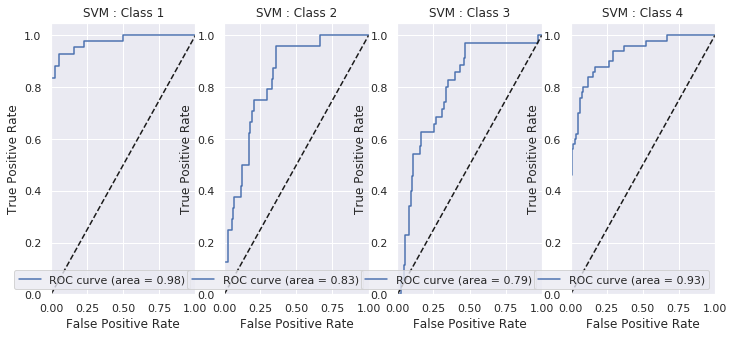

roc_auc_score:  0.8815098884135708


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

n_classes = 4

X = (data.values[:,2:])
y = data['label']
y = label_binarize(y, classes=[1,2,3,4])
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

from sklearn.svm import SVC


# classifier
clf = OneVsRestClassifier(SVC(probability=True))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
#probability=True

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(151+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM : Class %0.0f' % (idx+1) )
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_score, multi_class='raise'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


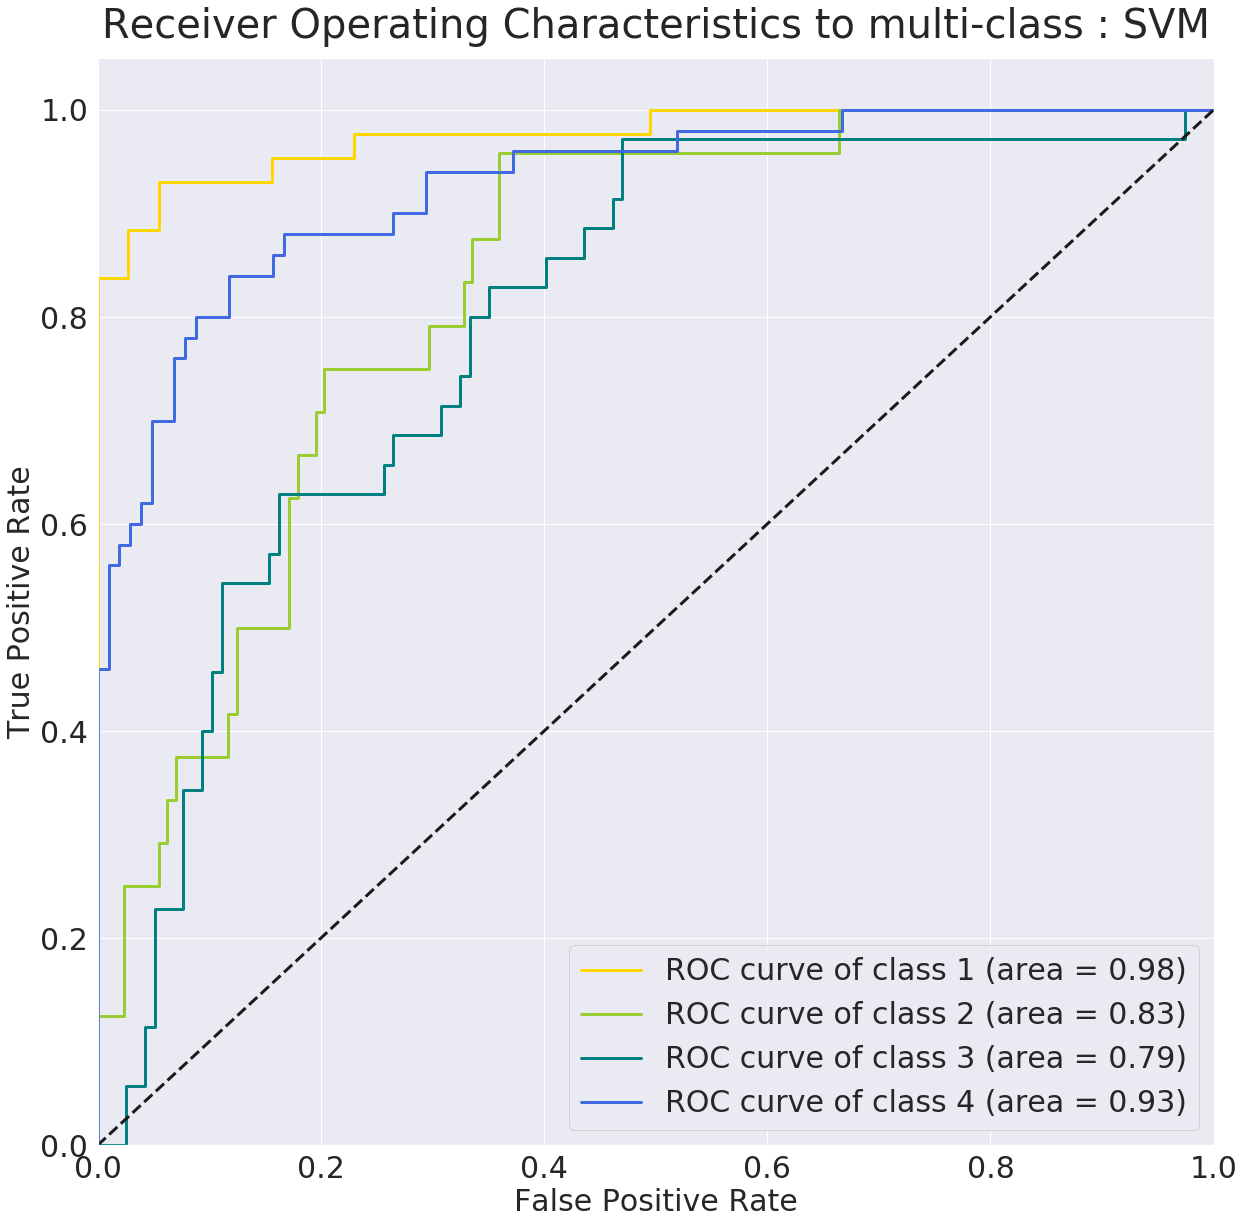

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
n_classes = 4
lw = 3
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

import matplotlib.pylab as plt

colors = cycle(['gold','yellowgreen','teal','royalblue','midnightblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.rcParams["figure.figsize"] = (20,20)
plt.xticks(fontsize =30)
plt.yticks(fontsize =30)
plt.plot([0,1 ], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 30)
plt.ylabel('True Positive Rate', fontsize = 30)
plt.title('Receiver Operating Characteristics to multi-class : SVM',fontsize = 40, pad=20 )
plt.legend(loc="lower right", fontsize = 30)
plt.show()